# Лабораторная работа №2
# Выполнил студент группы А-08-22
# Гречкин Владислав
# Вариант 5
<hr>

## Задача 1.  
Локализуйте максимальный вещественный корень уравнения $f(x)=0$ и найдите его
с точностью $\varepsilon$ , используя средства языка Python.


Исходные данные:  
$N = 5$  
$f(x) = 1.5x^3 - 8.4x^2 - 16x + 2$  
$\varepsilon = 10^{-9}$   


1. Построим график заданной функции, используя средства библиотеки <strong>matplotlib</strong>. По
графику определим отрезок локализации и начальное приближение для искомого корня. 

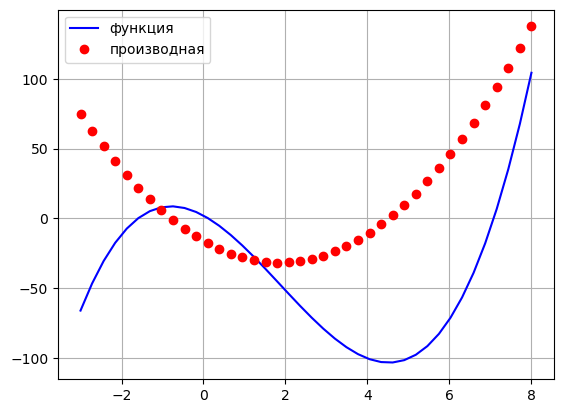

In [106]:
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return 1.5*x**3 - 8.4*x**2-16*x+2
#def df(x): # производная функции
#    return 4.5*x**2 - 84/5*x - 16

x = np.linspace(-3.0,8,40) # создаем последовательность из 40 равномерно распределленных точек
plt.grid(True) #показываем линии сетки
plt.plot(x,f(x),color = 'blue',label = 'функция') # строим график функции
#plt.plot(x,df(x),color = 'red',label = 'производная',ls='',marker='.',markersize=12)
plt.legend() # выводим легенду

Из графика выберем отрезком локализации максимального корня отрезок $[6,8]$ => начальное приближение $x_{0} = \frac{6+8}{2} = 7$ 

2. Найдем корень, используя библиотечную функцию <strong>scipy.optimize.newton()</strong>.
И найдем тот же корень, используя библиотечную функцию <strong>scipy.optimize.newton()</strong> с
передаваемой в нее производной. 

In [15]:
from scipy.optimize import newton

def df(x): # производная функции
    return 4.5*x**2 - 84/5*x - 16

x0 = 7 # начальное приближение 
res1 = newton(f,x0,tol=1e-9,full_output=True) # метод секущих
res2 = newton(f,x0,tol=1e-9,full_output=True,fprime=df) #метод Ньютона, с передаваемой производной

print('Метод секущих:\n',res1)
print('Метод Ньютона:\n',res2)



Метод секущих:
 (7.079993291008025,       converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 7.079993291008025)
Метод Ньютона:
 (7.079993291008025,       converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 7.079993291008025)


 Проконтролировал совпадение результатов.

## Задача 2.  
Даны два уравнения $f(x)=0$ и $g(x)=0$. Найдите с точностью
$\varepsilon = 10^{-10}$ все их корни,
содержащиеся на отрезке $[a, b]$. Для решения задачи реализуйте программно метод бисекции. 

Исходные данные:  

$N = 5$  
$f(x) = (cosx)^2 - (\frac{1}{\sqrt2} + \frac{1}{4})cosx+\frac{1}{4\sqrt2}$  
$g(x) = (cosx)^2 - \frac{2}{\sqrt2}cosx + \frac{1}{2}$  
$[a,b] = [0,1.5]$



1. Найдем аналитическое решение $f(x) = 0$ :  
$x = \frac{\pi}{4}+2\pi k$  
$x = \frac{7\pi}{4}+2\pi k$   
$x \approx 1.31812+2\pi k$  
$x \approx -1.31812+2\pi k$  
На отрезке $[a,b]$ это корень $\frac{\pi}{4}$
2.  Составим программу для нахождения корня с заданной точностью методом бисекции, с ее
помощью найдем корни уравнения с заданной точностью. 


In [104]:
from math import sin,cos,fabs
def f(x):
    return (cos(x))**2 - (1/2**0.5 + 1/4)*cos(x) + 1/(4*2**0.5)
    
e = 10**(-10) # заданная точность
def half_met(a,b,f):
    
    while b-a > 2*e:
        x = (a+b)/2 # ищем приближение
        if f(a)*f(x) < 0: # проверяем знаки значений функции
            a,b = a,x # берем левую половину
        else:
            a,b = x,b # берем правую половину
    return (a+b)/2
print(f'Корень уравнения: {half_met(0,1.5,f)}')

Корень уравнения: 0.785398163337959


3. Используя библиотечную функцию <strong>scipy.optimize.root()</strong>., найдем корни уравнения $f(x)=0$ с
заданной точностью. Сравним полученные результаты. 

In [72]:
from scipy.optimize import root 
x0 = (0+1.5)/2
Q = root(f,x0)
x_res = Q.x[0]


print(f'Корень уравнения методом бисекции: {half_met(0,1.5,f)}')
print('С помощью функции root:',x_res)

Корень уравнения методом бисекции: 0.785398163337959
С помощью функции root: 0.7853981633974483


Сравнивая эти два результата, можно сделать вывод, что программа для нахождения корня с заданной точностью методом бисекции выполнена верно.

Аналогично выполним алгоритм для функции $g(x)$

1. Найдем аналитическое решение $g(x) = 0$ :  
$x = \frac{\pi}{4}+2\pi k$  
$x = \frac{7\pi}{4}+2\pi k$  

2. Выполним программу для функции $g(x)$

In [105]:
def g(x):
    return (cos(x))**2 - 2/2**0.5*cos(x) + 1/2
x0 = (0+1.5)/2
Q = root(g,x0)
x_res_g = Q.x[0]
print(f'Корень уравнения методом бисекции: {half_met(0,1.5,g)}')
print('С помощью функции root:',x_res_g)


Корень уравнения методом бисекции: 1.4999999999126885
С помощью функции root: 0.7853981519016863


Получили разные ответы. Это произошло потому что функция $g(x)$ на отрезке $[0,1.5]$ обращается в ноль в точке $\frac{\pi}{4}$, но на этом отрезке она "полностью лежит" выше нуля, то есть не меняет знак, поэтому мы выбирали постоянно правую половину отрещка и из-за этого метод бисекции выдает неправильный результат, так как для него необходимо, чтобы функция монотонно возрастала или убывала на отрезке локализации

## Задача 3
Методом простой итерации найти <u>все вещественные корни</u> уравнения из задачи 1 c точностью $\varepsilon = 10^{-13}$. Проследить за поведением погрешности. 

$f(x) = 1.5x^3 - 8.4x^2 - 16x + 2$

1.  Локализуем все вещественные корни заданного уравнения. Для этого сделаем табулирование функции и производной.

In [112]:
from prettytable import PrettyTable

def f(x):
    return 1.5*x**3 - 8.4*x**2-16*x+2
def df(x): # производная функции
    return 4.5*x**2 - 84/5*x - 16

table_fx = PrettyTable()
table_dfx = PrettyTable()
table_fx.field_names = ['x','f(x)']
table_dfx.field_names = ['x','df(x)']
x = np.linspace(-4.0,8,60)
for i in x:
    table_fx.add_row([i,f(i)])
    table_dfx.add_row([i,df(i)])
print(table_fx)
print(table_dfx)

+---------------------+---------------------+
|          x          |         f(x)        |
+---------------------+---------------------+
|         -4.0        |        -164.4       |
| -3.7966101694915255 | -140.42185228285268 |
|  -3.593220338983051 | -118.55218108959535 |
|  -3.389830508474576 |  -98.71526300157271 |
| -3.1864406779661016 |  -80.83537460012951 |
|  -2.983050847457627 |  -64.8367924666105  |
| -2.7796610169491522 |  -50.6437931823604  |
| -2.5762711864406778 |  -38.18065332872397 |
| -2.3728813559322033 |  -27.3716494870459  |
|  -2.169491525423729 |  -18.14105823867095 |
| -1.9661016949152543 | -10.413156164943842 |
| -1.7627118644067794 |  -4.112219847209303 |
|  -1.559322033898305 |  0.8374741331879143 |
| -1.3559322033898304 |  4.511649194903082  |
| -1.1525423728813555 |  6.986028756591475  |
|  -0.949152542372881 |   8.33633623690835  |
| -0.7457627118644066 |   8.63829505450898  |
| -0.5423728813559321 |  7.967628628048631  |
| -0.3389830508474576 |  6.4000603

С помощью табулирования и графиков функции из задания 1 получаем следующие отрезки локализации:  
$[-1.76,-1.56]$, $[0,0.2]$, $[6.98,7.18]$

2. Построим расчетные формулы метода простой итерации с оптимальным параметром:  
$x^{n+1} = x^n - \alpha f(x^n)$, где $\alpha = \frac{2}{m + M}$, $m = min_{[a,b]} f^\prime(x)$, $M = max_{[a,b]} f^\prime(x)$,  
$[a,b]$ - очередной отрезок локализации.

2.1. Для отрезка $[−1.76,−1.56]$:  
    $m = f^\prime(b) = f^\prime(-1.56) = 21.1$  
    $M = f^\prime(a) = f^\prime(-1.76) = 27.5$  
    
2.2. Для отрезка $[0,0.2]$:  
    $m = f^\prime(b) = f^\prime(0.2) = -19.8$  
    $M = f^\prime(a) = f^\prime(0) = -16$  
  
2.3. Для отрезка $[6.98, 7.18]$:  
    $m = f^\prime(a) = f^\prime(6.98) = 86$  
    $M = f^\prime(b) = f^\prime(7.18) = 95.4$  
    
    

3. Составим программу для нахождения корня с заданной точностью методом простой итерации с оптимальным параметром.

In [149]:
def main1(left,right,m,M):


    a = 2/(M+m) # альфа
    q = abs((M-m)/(M+m))
    e = 10**(-13) # заданная погрешность
    x0 = (left+right)/2 #начальное приближение

    Q = root(f,x0) # находим корень с помощью root
    x_root = Q.x[0]
    
    def mpi(a,q,e,x0,my_table,x_root): # будем вносить данные в my_table для удобства
        x1 = x0 
        x2 = x1 - a*f(x1)
        k = 1
        while abs(x2-x1) > e*(1-q)/q:
            x1 = x2 
            x2 = x1 - a*f(x1)
            d = abs(x_root - x1) # Апостериорная оценка погрешности
            my_table.add_row([k,x1,d]) # добавляем строку в таблицу
            k+=1
        my_table.add_row([k,x2,abs(x_root - x2)])
    print(f'Данные:\na={a}, q = {q}\ne={e}, x0 = {x0}')
    table1 = PrettyTable() # создаем пустую таблицу
    table1.field_names=['Номер итерации n','Приближение x^n','Апостериорная оценка погрешности']
    mpi(a,q,e,x0,table1,x_root)
    print(table1)


<strong>3.1.</strong> Для отрезка локализации $[−1.76,−1.56]$ :

In [150]:
left = -1.76
right = -1.56
m = 21.1
M = 27.5
main1(left,right,m,M)

Данные:
a=0.0411522633744856, q = 0.13168724279835387
e=1e-13, x0 = -1.6600000000000001
+------------------+---------------------+----------------------------------+
| Номер итерации n |   Приближение x^n   | Апостериорная оценка погрешности |
+------------------+---------------------+----------------------------------+
|        1         | -1.6003916049382716 |      0.0025376688840450523       |
|        2         | -1.5980552122207226 |      0.00020127616649601165      |
|        3         | -1.5978702021374664 |      1.6266083239901974e-05      |
|        4         | -1.5978552525244882 |      1.3164702616919044e-06      |
|        5         | -1.5978540426133354 |      1.0655910887003017e-07      |
|        6         | -1.5978539446795275 |      8.625300917941559e-09       |
|        7         | -1.5978539367523918 |      6.981653033477642e-10       |
|        8         | -1.5978539361107387 |      5.651212831025987e-11       |
|        9         | -1.5978539360588009 |       4.574

<strong>3.2.</strong> Для отрезка локализации $[0,0.2]$ :

In [151]:
left = 0
right = 0.2
m = -19.8
M = -16

main1(left,right,m,M)

Данные:
a=-0.0558659217877095, q = 0.10614525139664807
e=1e-13, x0 = 0.1
+------------------+---------------------+----------------------------------+
| Номер итерации n |   Приближение x^n   | Апостериорная оценка погрешности |
+------------------+---------------------+----------------------------------+
|        1         | 0.11773743016759777 |      0.00012321487860379732      |
|        2         | 0.11786075916841703 |      1.1412221545548107e-07      |
|        3         | 0.11786064493431303 |      1.1188854009969162e-10      |
|        4         | 0.11786064504631123 |      1.0966227925734984e-13      |
|        5         | 0.11786064504620143 |      1.3877787807814457e-16      |
+------------------+---------------------+----------------------------------+


<strong>3.3.</strong> Для отрезка локализации $[6.98,7.18]$ :

In [152]:
left = 6.98
right = 7.18
m = 86
M = 95.4

main1(left,right,m,M)

Данные:
a=0.011025358324145534, q = 0.05181918412348404
e=1e-13, x0 = 7.08
+------------------+--------------------+----------------------------------+
| Номер итерации n |  Приближение x^n   | Апостериорная оценка погрешности |
+------------------+--------------------+----------------------------------+
|        1         | 7.079993296582138  |      5.5741145033039174e-09      |
|        2         | 7.0799932910126655 |      4.6416204213528545e-12      |
|        3         | 7.079993291008029  |      5.329070518200751e-15       |
|        4         | 7.079993291008026  |      1.7763568394002505e-15      |
+------------------+--------------------+----------------------------------+


4. Анализ результатов:  
Точность $\varepsilon = 10^{-13}$ достигается на:
<ul> 
    <li>11 итерации в 3.1 </li>
    <li> 5 итерации в 3.2 </li>
    <li> 4 итерации в 3.3 </li>
</ul> 

Для последнего корня скорость работы по количеству итераций оказалась самой быстрой.

 Практическое значение знаменателя прогресии:  
        для 3.1: $\frac{2.9753977059954195e-14}{3.6992631180510216e-13} = 0.0804$  
        для 3.2 = $0.00127$  
        для 3.3 = $0.3333$

Объясняем причину различия найденных выше
значений для разных корней - количество итераций напрямую зависит
от значения q, а оно в свою зависит от максимального и минимального
значения производной на отрезке локализации функции.